In [21]:
#Можно ли отличить подделку вина от настоящего

#Источник: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [25]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

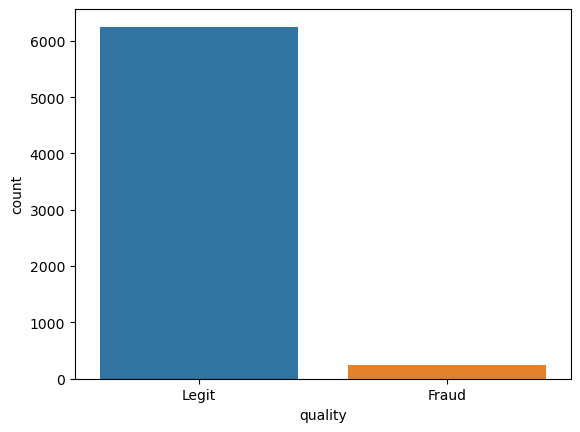

In [26]:
sns.countplot(x = 'quality', data=df,hue = 'quality')

<Axes: xlabel='type', ylabel='count'>

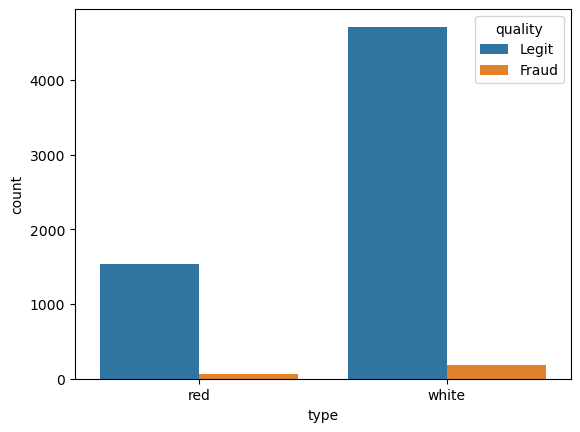

In [27]:
sns.countplot(x = 'type', data=df,hue = 'quality')

In [28]:
len(df[df['quality'] == 'Fraud'][df['type'] == 'red'])*100/len(df[df['type'] == 'red'])


C:\Users\snoga\AppData\Local\Temp\ipykernel_13324\1190220684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['quality'] == 'Fraud'][df['type'] == 'red'])*100/len(df[df['type'] == 'red'])


3.9399624765478425

In [29]:
len(df[df['quality'] == 'Fraud'][df['type'] == 'white'])*100/len(df[df['type'] == 'white'])

C:\Users\snoga\AppData\Local\Temp\ipykernel_13324\462196465.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['quality'] == 'Fraud'][df['type'] == 'white'])*100/len(df[df['type'] == 'white'])


3.736218864842793

In [30]:
df_object_dummies = pd.get_dummies(df.drop('type', axis=1))
df_object_dummies['quality_Fraud'] = df_object_dummies['quality_Fraud'].astype(int)
df_object_dummies['Fraud'] = df_object_dummies['quality_Fraud']
df = df_object_dummies.drop(['quality_Fraud', 'quality_Legit'], axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [31]:
df.corr(numeric_only=True)['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

In [32]:
col = df.drop('Fraud', axis=1).columns
#coef_corr = pd.DataFrame(index = df.columns(), data = )

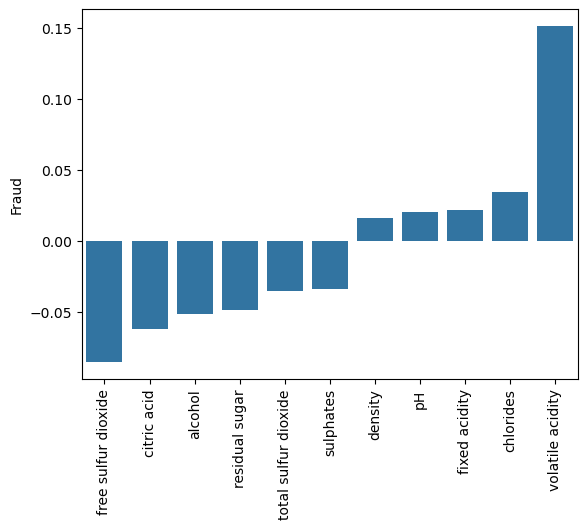

In [33]:
data=df.corr(numeric_only=True)['Fraud'].drop('Fraud').sort_values()
sns.barplot(data)
plt.xticks(rotation=90)
plt.show()

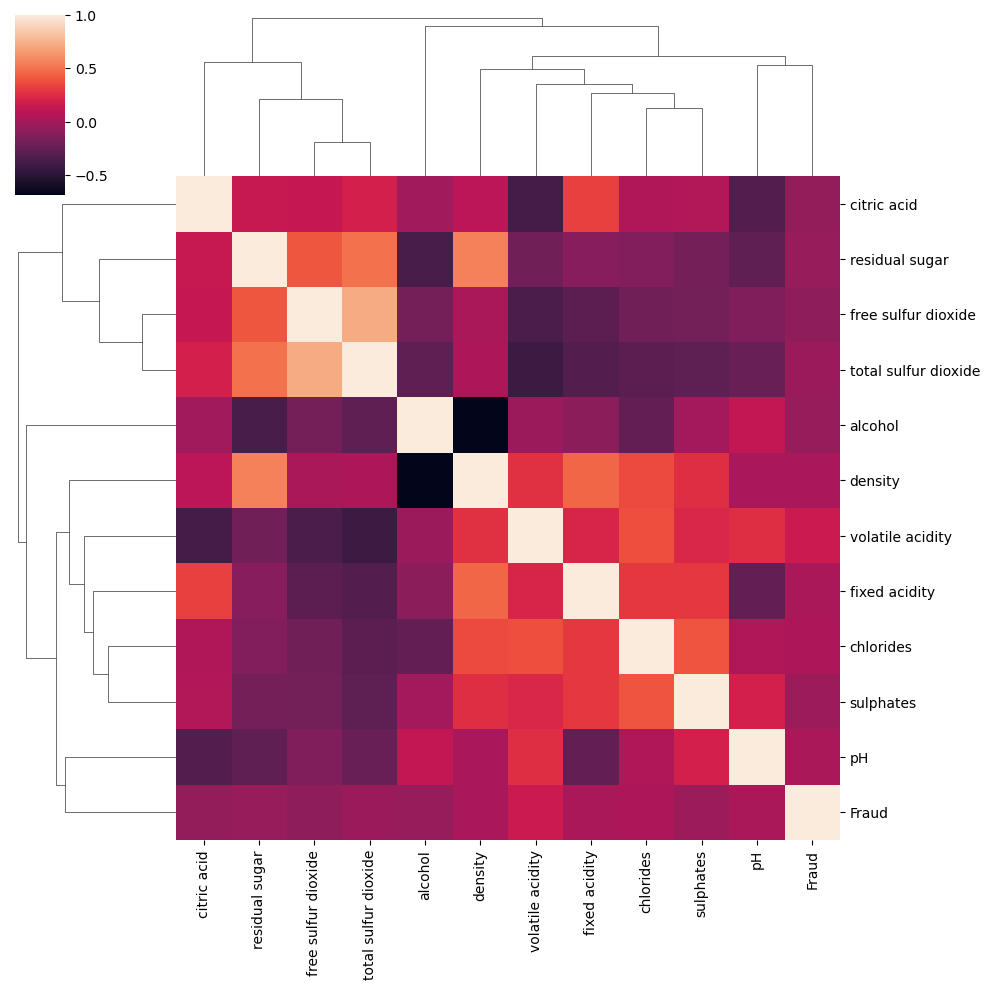

In [34]:
sns.clustermap(df.corr())

In [35]:
df_dop = pd.read_csv("../DATA/wine_fraud.csv")
df_object_dummies = pd.get_dummies(df_dop.drop('quality', axis=1))
df_object_dummies['type_white'] = df_object_dummies['type_white'].astype(int)
df_object_dummies['type'] = df_object_dummies['type_white']
df_object_dummies = df_object_dummies.drop(['type_white', 'type_red'], axis=1)
df['type'] = df_object_dummies['type']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,1


In [36]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.svm import SVC

In [42]:
svc_model = SVC(class_weight='balanced')

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale', 'auto']}

In [45]:
grid = GridSearchCV(svc_model, param_grid)

In [46]:
grid.fit(scaled_X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
full_pred = grid.predict(scaled_X_test)

In [49]:
confusion_matrix(full_pred, y_test)

array([[531,  10],
       [ 92,  17]], dtype=int64)

In [50]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       623
           1       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

